# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
# Load data
df=pd.read_csv('data/cars.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())


720


In [5]:
#  2. Modify our df to have all duplicate rows removed. 
df=df.drop_duplicates()


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()
        

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [8]:
# * Print how long our dataframe is.
print("We have {} columns in our data with {} rows".format(df.shape[1],df.shape[0]))
 

We have 15 columns in our data with 11194 rows


In [9]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print("After dropping the null values. We have {} columns in our data with {} rows:".format(df.shape[1],df.shape[0]))


After dropping the null values. We have 15 columns in our data with 11092 rows:


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

In [11]:
df['Make'].value_counts() #show all the car makes

Chevrolet        1075
Ford              811
Toyota            713
Volkswagen        564
Nissan            541
Dodge             528
GMC               482
Honda             431
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            339
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               224
Mitsubishi        205
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           152
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            68
Scion              60
FIAT               59
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Bugatti             3
Genesis   

<AxesSubplot:xlabel='Make'>

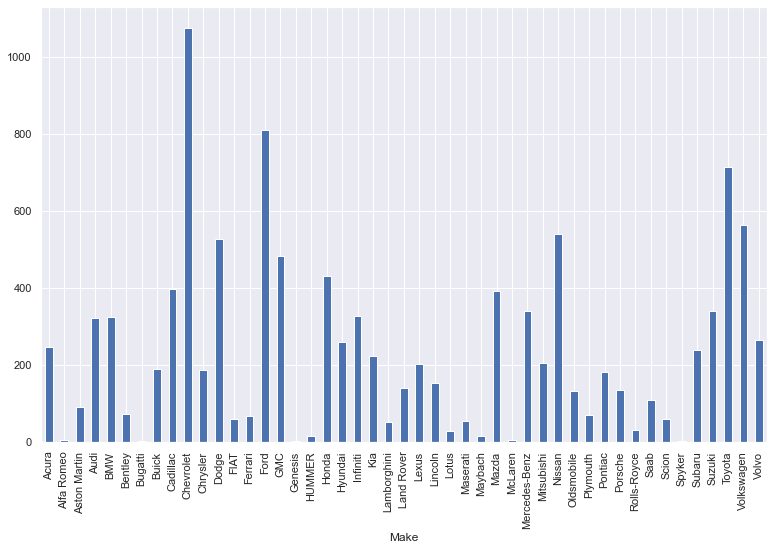

In [14]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

#group by make 
gb = df.groupby('Make') 

car_make = gb['Make'].count()
car_make.plot(kind="bar",figsize= (13,8))#display graph
    


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:ylabel='Make'>

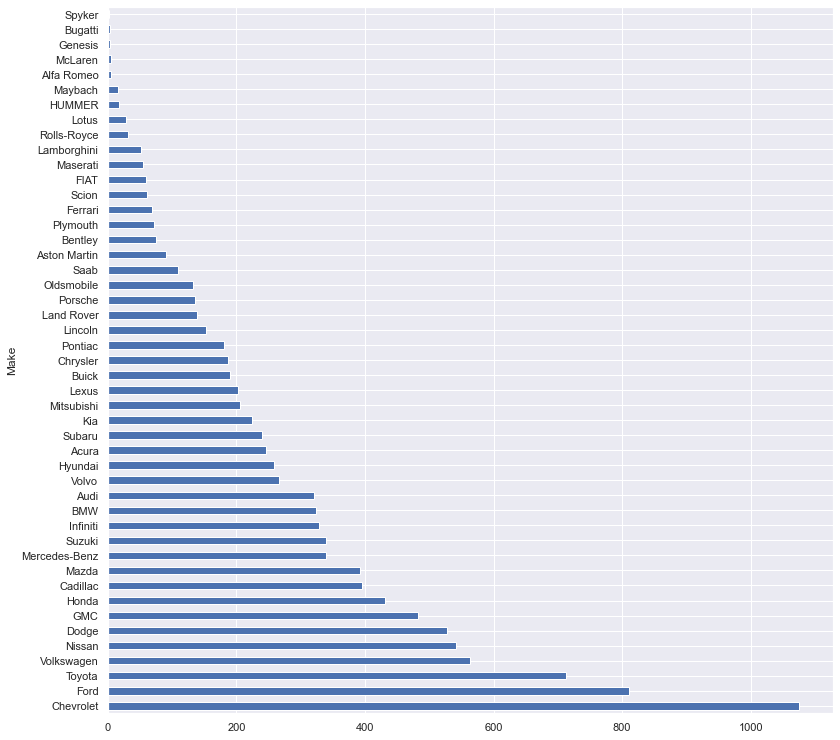

In [15]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

# make changes to car_make to have sort_values, asceding = false to make it lowest to highest
car_make = car_make.sort_values(ascending = False)
car_make.plot(kind='barh', figsize=(13,13))

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

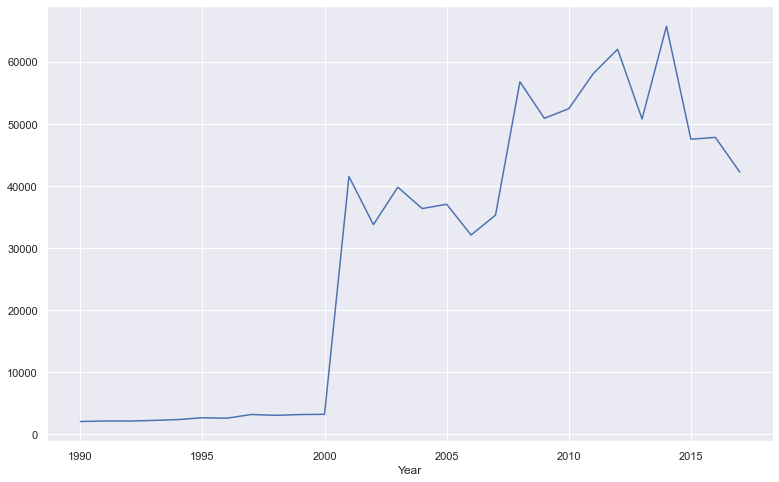

In [21]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
car_MSRP = df.groupby('Year')['MSRP'].mean()

car_MSRP.plot(kind='line',x='Year',y='MSRP',figsize=(13,8))

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [23]:
# Make a column where is 10 when year is less than 2000, else 1.
year_condition = df['Year'] <= 2000
df['price_adjuster'] = np.where(year_condition,10,1)
df[year_condition]
# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df.MSRP*df.price_adjuster
df[year_condition]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,price_adjuster,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,10,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,10,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,10,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,10,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,10,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,23,16,640,2000,10,20000
11832,GMC,Yukon Denali,2000,regular unleaded,255.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,15,11,549,3949,10,39490
11881,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,24,17,3916,4976,10,49760
11882,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,24,17,3916,4697,10,46970


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

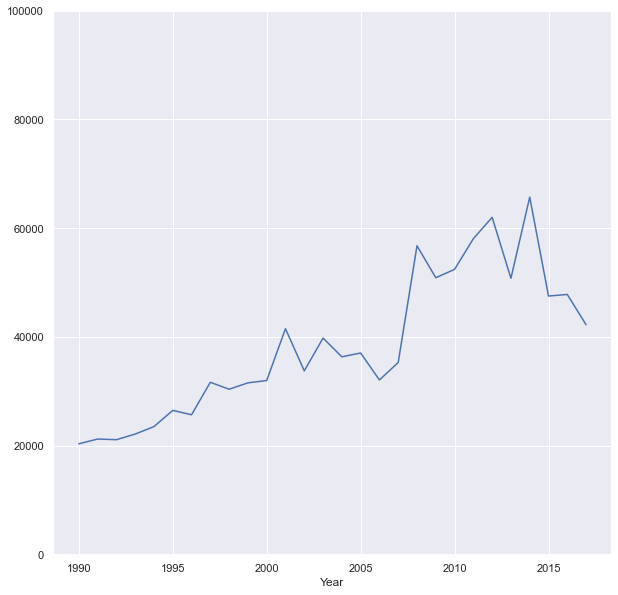

In [24]:
# Plot new prices
car_MSRP = df.groupby('Year')['adjusted_price'].mean()

car_MSRP.plot(kind='line', x='Year',y='adjusted_price',figsize=(10,10),ylim=[0,100000])

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [25]:
# What are the top 5 car makers make the most expensive cars on average. 
gb = df.groupby('Make')
most_expensive = gb['MSRP'].mean()

most_expensive = most_expensive.sort_values(ascending= False)
most_expensive.head()



Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: MSRP, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [26]:
# Which car makers have the highest median highway MPG?
gb = df.groupby('Make')
high_highway = gb['highway MPG'].median()

high_highway = high_highway.sort_values(ascending=False)
high_highway.head()



Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

Text(0.5, 1.0, 'Adjusted Price for Tree Car Makers')

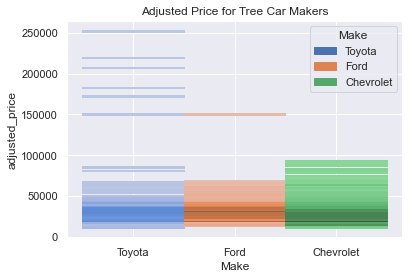

In [27]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
list_makers=['Chevrolet','Ford','Toyota']
condition= df.Make.isin(list_makers)
temp_df = df[condition]
hist_make=sns.histplot(data=temp_df, x='Make', y='adjusted_price', hue='Make')
hist_make.set_title("Adjusted Price for Tree Car Makers")

# Remake the same histogram, but limit the x-axis from 0 to 100,000

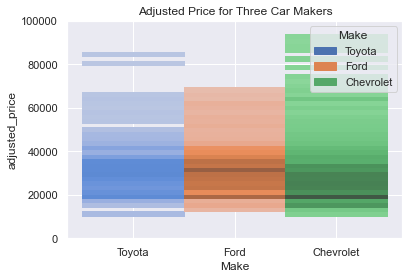

In [28]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
list_makers= ['Chevrolet', 'Ford', 'Toyota']
condition = df.Make.isin(list_makers)
temp_df = df[condition]
hist_make=sns.histplot(data=temp_df, x='Make',y='adjusted_price', hue='Make')
hist_make.set_title("Adjusted Price for Three Car Makers");
hist_make.set_ylim(0,100000);


# Plot the relationship between Engine HP and highway MPG

Text(0.5, 1.0, 'Relationship between Engine HP and Highway MPG')

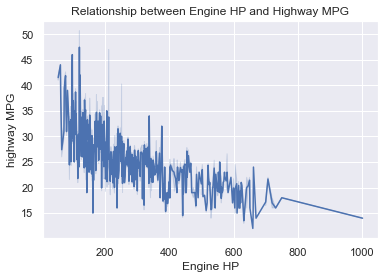

In [29]:
# Plot the relationship between Engine HP and highway MPG
line_engine_highway=sns.lineplot(data=df, x='Engine HP', y='highway MPG')
line_engine_highway.set_title("Relationship between Engine HP and Highway MPG")

Text(0.5, 1.0, 'Boxplot for Engine HP')

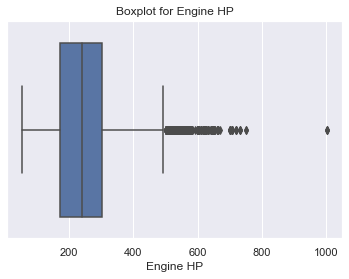

In [31]:
# create a boxplot for the 'Engine HP'
box_engine =sns.boxplot(data=df, x= 'Engine HP')
box_engine.set_title("Boxplot for Engine HP")

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

# Make another boxplot for highway MPG

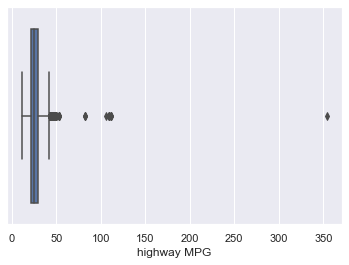

In [32]:
# create a boxplot for the 'highway MPG'
box_highway = sns.boxplot(data=df,x="highway MPG")

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [33]:
# Remove any  outliers from Engine HP and highway MPG 

#calculate q1 for both Engine HP and highway MPG
q1_engine= df['Engine HP'].quantile(0.25)
q1_highway= df['highway MPG'].quantile(0.25)

#calculate q3 for both 
q3_engine= df['Engine HP'].quantile(0.75)
q3_highway= df['highway MPG'].quantile(0.75)

#define the IQR (q3-q1)
IQR_engine = q3_engine - q1_engine
IQR_highway = q3_highway - q1_engine

#make select condition for the values that fall BELOW the q1-1.5*IQR
engine_outliers_below = df['Engine HP'] < (q1_engine - 1.5 * IQR_engine)
highway_outliers_below = df['highway MPG'] < (q1_highway - 1.5 * IQR_highway)

#make select condition for the values that fall ABOVE the q3+ 1.5*IQR
engine_outliers_above = df['Engine HP'] > (q3_engine + 1.5 * IQR_engine)
highway_outliers_above = df['highway MPG'] > (q3_highway + 1.5 * IQR_highway)

#select the inverse of the selection 
df_engine = df[~(engine_outliers_above|engine_outliers_below)]
df_highway = df[~(highway_outliers_above|highway_outliers_below)]


# Remake the boxplots for both Engine HP and highway MPG


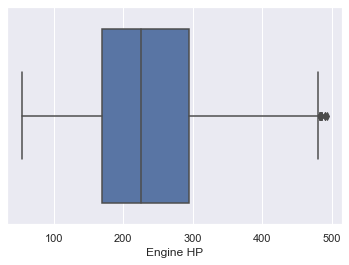

In [34]:
# Engine HP boxplot
box_engine =sns.boxplot(data=df_engine, x= 'Engine HP')

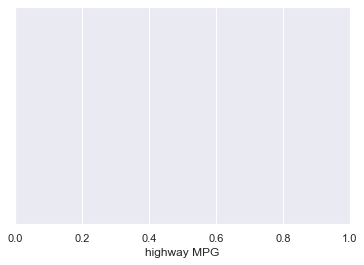

In [35]:
# highway MPG boxplot
box_highway = sns.boxplot(data=df_highway, x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

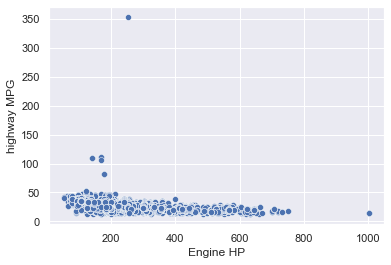

In [36]:
# Make a scatter plot of Engine HP vs highway MPG
scatter_engine_highway= sns.scatterplot(data=df, x="Engine HP", y='highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [37]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('higher the highway MPG, lower the Engine HP & higher the Engine HP, lower highway MPG')

higher the highway MPG, lower the Engine HP & higher the Engine HP, lower highway MPG


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

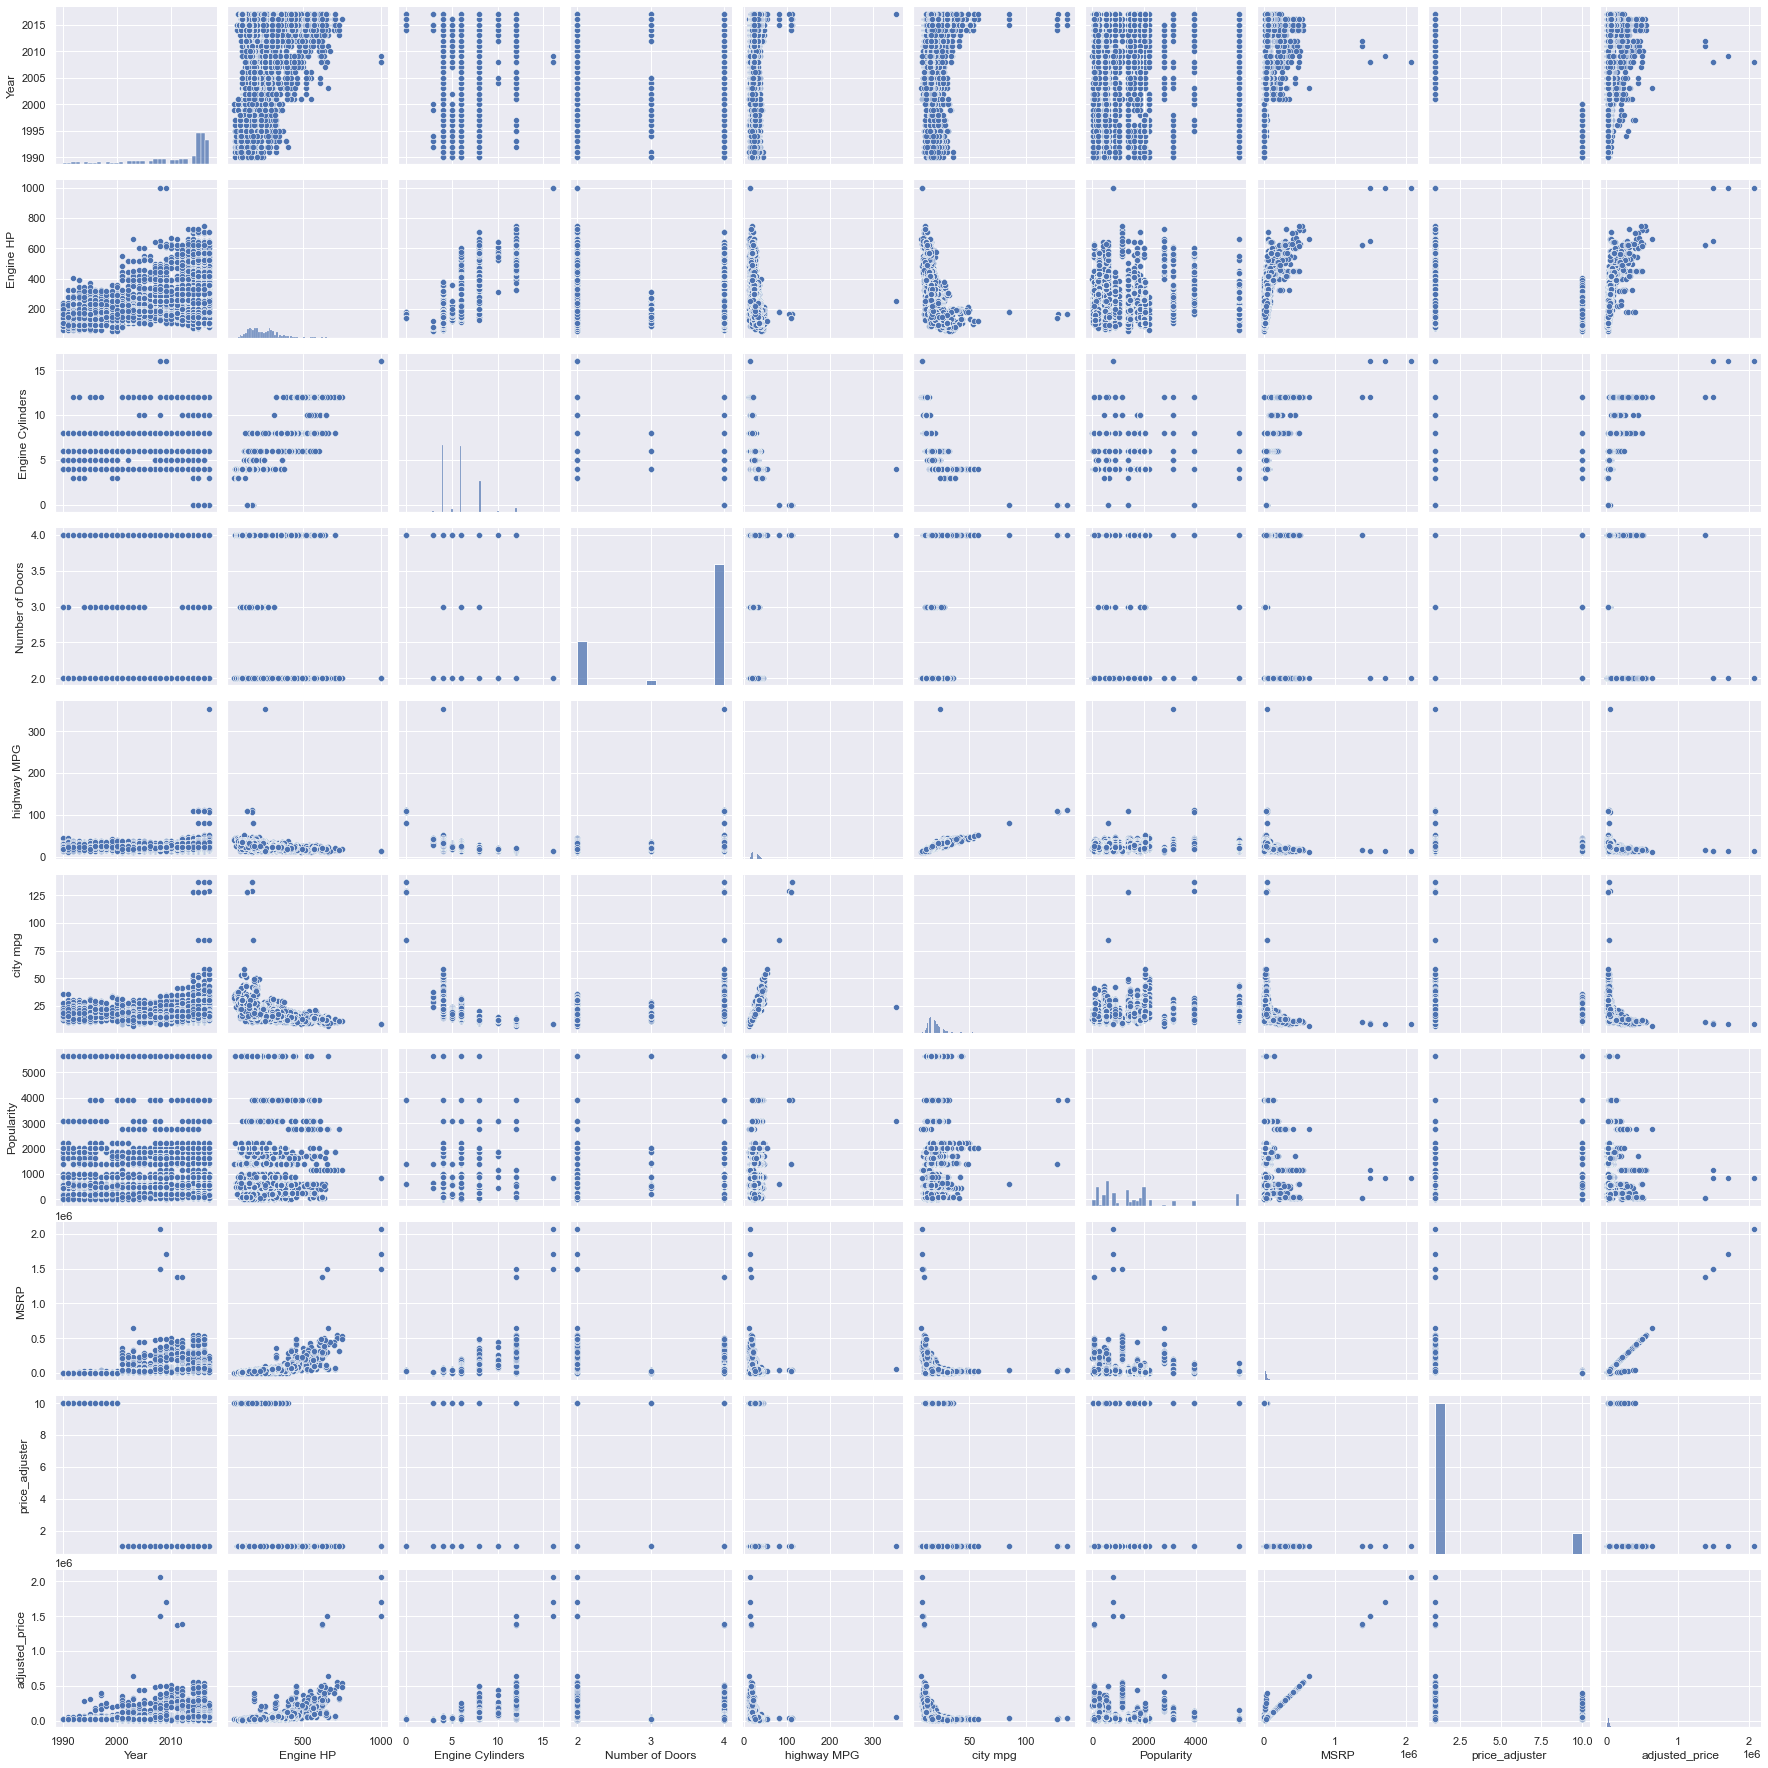

In [39]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)

In [40]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("city mpg & highway mpg have a strong linear relation")


city mpg & highway mpg have a strong linear relation


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

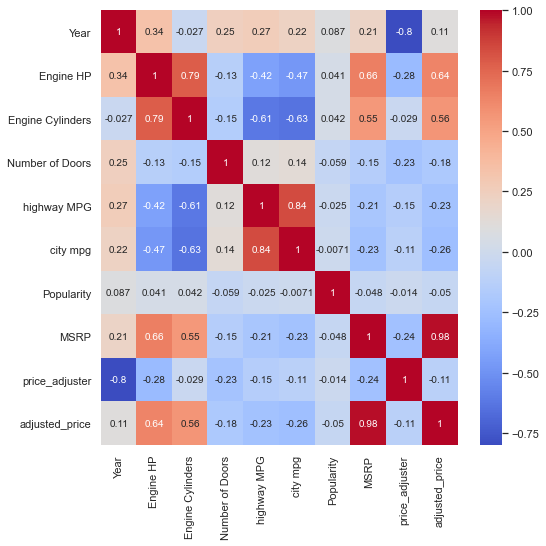

In [44]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
car_corr = df.corr()

plt.figure(figsize=(8,8))
heat_corr=sns.heatmap(car_corr, annot=True, cmap='coolwarm')



In [45]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.


print('Engine HP and Engine Cylinders have a strong relationship with each other')
print('this is due to the fact that you need better engine cylinders to have better engine hp')

Engine HP and Engine Cylinders have a strong relationship with each other
this is due to the fact that you need better engine cylinders to have better engine hp


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [46]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
df.columns = df.columns.str.replace(' ', '_') # replaces the space with _ in the columns 
df.columns = df.columns.str.lower() # makes the columns lowercase
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_adjuster,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
